In [22]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def comprehensive_preprocessing(text):
    # Menghapus URL
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Menghapus karakter khusus dan angka
    text = re.sub(r'\W|[\d_]', ' ', text)

    # Menghapus kata yang berulang
    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

    # Menghapus emoji atau simbol khusus
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"
        "]+"
    )
    text = emoji_pattern.sub(r'', text)

    # Menghapus tanda baca
    text = re.sub(r'[^\w\s#]', ' ', text)

    # Menghapus kata-kata singkat
    text = ' '.join([word for word in text.split() if len(word) > 2])

    # Menghapus mention
    text = re.sub(r'@\w+', '', text)

    # Mengonversi teks ke huruf kecil
    text = text.lower()

    # Menghapus spasi berlebih
    text = ' '.join(text.split())

    # Buat stemmer
    # factory = StemmerFactory()
    # stemmer = factory.create_stemmer()

    # Buat stopword remover
    stopword_factory = StopWordRemoverFactory()
    stopword_remover = stopword_factory.create_stop_word_remover()

    text = stopword_remover.remove(text)

    # # Stemming
    # text = stemmer.stem(text)

    return text

In [23]:
import pandas as pd

df = pd.read_csv('data/dataset_jurnal_indo_5k.csv')

df['data'] = df['title'] + df['abstrac_clean']
df.head(1200)

,jid,aid,date,title,desc,abstrac_clean,data
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,penelitian ini bertujuan untuk menentukan meto...,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,penelitian tentang penyimpanan mangga secara ...,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,penelitian ini bertujuan untuk mengetahui pen...,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,penelitian ini bertujuan untuk mengetahui kon...,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,keju mozarella salah satu keju khas italia ya...,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...
...,...,...,...,...,...,...,...
1195,10120,oai:ojs.journal2.um.ac.id:article/1701,2016-09-01,Pengaruh Pengalaman Praktik Kerja Industri dan...,Abstract : Industrial work practice is one of ...,praktik kerja industri merupakan salah satu u...,Pengaruh Pengalaman Praktik Kerja Industri dan...
1196,10120,oai:ojs.journal2.um.ac.id:article/1660,2015-07-03,Adaptation Entrepreneurship Education Model Cu...,The purpose of this research is the discovery ...,tujuan penelitian ini adalah ditemukannya mod...,Adaptation Entrepreneurship Education Model Cu...
1197,10120,oai:ojs.journal2.um.ac.id:article/1692,2016-07-01,Meningkatkan Percaya Diri dan Hasil Belajar Si...,Abstract : This research is aimed at generatin...,penelitian ini bertujuan menghasilkan modul d...,Meningkatkan Percaya Diri dan Hasil Belajar Si...
1198,10120,oai:ojs.journal2.um.ac.id:article/1683,2015-11-06,Pemberdayaan Kelompok Petani Ikan Tawar,The aim of this study is to describe the group...,tujuan dari penelitian ini adalah untuk memap...,Pemberdayaan Kelompok Petani Ikan Tawar tujua...


In [24]:
# data = df['data'].astype(str).apply(comprehensive_preprocessing).tolist()

# Jurnal Id yang digunakan
# - 10004
# - 1000
# - 10060
# - 10063
# - 10120

# jurnal_id = 1000
# jurnal_id = 10004
jurnal_id = 10060
# jurnal_id = 10063
# jurnal_id = 10120

data_jid = df[df['jid']==jurnal_id]
data = data_jid['data'].astype(str).apply(comprehensive_preprocessing).tolist()
data_jid

,jid,aid,date,title,desc,abstrac_clean,data
0,10004,oai:ojs2.profood.unram.ac.id:article/11,2017-03-17,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...,The aimed of this research was to investigate ...,penelitian ini bertujuan untuk menentukan meto...,EFEKTIVITAS PERLAKUAN OZON TERHADAP MUTU KANGK...
1,10004,oai:ojs2.profood.unram.ac.id:article/12,2017-03-17,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...,Modified Atmosphere Storage of Mango with Ca(O...,penelitian tentang penyimpanan mangga secara ...,PENYIMPANAN MANGGA SECARA MODIFIKASI ATMOSFI...
2,10004,oai:ojs2.profood.unram.ac.id:article/13,2017-03-17,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...,The aimed of this research was to determine th...,penelitian ini bertujuan untuk mengetahui pen...,PENGARUH RASIO SUSU FULL CREAM DENGAN JAGUNG ...
3,10004,oai:ojs2.profood.unram.ac.id:article/14,2017-03-17,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...,This study aims to determine the best probioti...,penelitian ini bertujuan untuk mengetahui kon...,KAJIAN MUTU DAN DAYA SIMPAN KEJU MOZZARELLA PR...
4,10004,oai:ojs2.profood.unram.ac.id:article/15,2017-03-17,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...,Mozzarella cheese is one of the Italian cheese...,keju mozarella salah satu keju khas italia ya...,PENGARUH PENAMBAHAN PROBIOTIK (Lactobacillus c...
...,...,...,...,...,...,...,...
104,10004,oai:ojs2.profood.unram.ac.id:article/205,2022-01-15,KARAKTERISASI BAKTERI LIPOLITIK Bacillus sp. P...,ABSTRACT\nOne of the leading enzymes having th...,salah satu enzim utama berpotensi menyumbang k...,KARAKTERISASI BAKTERI LIPOLITIK Bacillus sp. P...
105,10004,oai:ojs2.profood.unram.ac.id:article/209,2022-01-24,Kajian Penambahan Ubi Jalar Ungu (Ipomoea bata...,ABSTRACT\nYoghurt is a drink made from the fer...,yoghurt adalah minuman yang terbuat dari prose...,Kajian Penambahan Ubi Jalar Ungu (Ipomoea bata...
106,10004,oai:ojs2.profood.unram.ac.id:article/215,2021-12-31,KARAKTERISASI MUTU TEH HITAM METODE CTC (Crush...,Abstract\nThis study aims to test the quality ...,penelitian ini bertujuan untuk menganalisis mu...,KARAKTERISASI MUTU TEH HITAM METODE CTC (Crush...
107,10004,oai:ojs2.profood.unram.ac.id:article/225,2022-01-15,"ANALISIS MUTU KIMIA, MIKROBIOLOGI DAN ORGANOLE...",ABSTRACT\nThis study was aimed to analyze the ...,penelitian ini bertujuan untuk menganalisis mu...,"ANALISIS MUTU KIMIA, MIKROBIOLOGI DAN ORGANOLE..."


In [25]:
import torch
from transformers import BertTokenizer, AutoModel
from sklearn.cluster import KMeans
import numpy as np

# Load pre-trained IndoBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased')
model = AutoModel.from_pretrained('indolem/indobert-base-uncased')

In [26]:
def tokenize_data(texts, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
                            text,
                            add_special_tokens=True,
                            max_length=max_length,
                            pad_to_max_length=True,
                            return_attention_mask=True,
                            return_tensors='pt'
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

In [27]:
# Tokenisasi data
input_ids, attention_masks = tokenize_data(data, tokenizer)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [28]:
data[1]

'penyimpanan mangga modifikasi atmosfir penggunaan absorbent penelitian penyimpanan mangga modifikasi atmosfir penggunaan caoh absorbent bertujuan mempelajari respon fisiologis biokimia buah mangga selama penyimpanan minggu rancangan percobaan dilakukan rancangan acak kelompok rak kombinasi jenis kemasan plastik polietilen polipropilen caoh absorbent berikut kemasan plastik karton caoh polietilen caoh polipropilen karton caoh analisa data dilakukan analisis keragaman taraf nyata dilanjutkan uji beda nyata terkecil taraf nyata sama analisa dilakukan tingkat respirasi produksi etilen tingkat kerusakan susut berat aktivitas enzim acc oksidase selama penyimpanan minggu tingkat respirasi produksi etilen buah mangga disimpan atmosfir termodifikasi jauh lebih rendah tingkat respirasi produksi etilen buah mangga disimpan kemasan buah mangga disimpan modifikasi atmosfir lebih rendah persentase kerusakan susut beratnya kemasan aktivitas enzim acc oksidase buah mangga disimpan modifikasi atmosfir

In [29]:
input_ids[1]

tensor([    3, 10529, 15840, 15139, 26634,  3625, 10656,  1522, 14058,   930,
         3528, 10529, 15840, 15139, 26634,  3625, 12716,   945, 10656,  1522,
        14058,   930,  6344,  5897,  7235, 29579, 27262,  3221, 15840,  2015,
        10529,  3554,  6651,  9165,  2067,  6651, 16158,  2486,  2351,  9796,
         2659, 12298,  8793,  6748, 25887,  1478,  6748, 19484,  5828, 12255,
        12716,   945, 10656,  1522, 14058,   930,  2570, 12298,  8793,  6786,
         1503, 12716,   945,  6748, 25887,  1478, 12716,   945,  6748, 19484,
         5828, 12255,  6786,  1503, 12716,   945, 12199,  3145,  2067,  6205,
        14844, 13959,  5169,  6862,  7119,  6639,  5169, 15375, 13959,  5169,
         1959, 12199,  2067,  2842, 25463,  2634,  1499,  3506, 17907, 12255,
         2842,  3273,  6553,   930,  3314,  4208, 11724, 11215, 17330,  1585,
         2015, 10529,  3554,  2842, 25463,  2634,  1499,  3506, 17907, 12255,
         3221, 15840,  8285, 26634, 27705,  2046,  3777,     4])

In [30]:
from torch.utils.data import Dataset, DataLoader

# Buat dataloader
class ArticleDataset(Dataset):
    def __init__(self, input_ids, attention_masks):
        self.input_ids = input_ids
        self.attention_masks = attention_masks

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx]
        }

    def __len__(self):
        return len(self.input_ids)

dataset = ArticleDataset(input_ids, attention_masks)

In [31]:
# Membuat dataloader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [32]:
import torch

device = 'cpu'
if torch.cuda.is_available() :
    device = 'cuda'
    model = model.to(device)


# Set model ke mode evaluasi (non-training)
model.eval()

# Embedding
embeddings = []


with torch.no_grad():
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        last_hidden_states = outputs.last_hidden_state

        embeddings.append(last_hidden_states.cpu().numpy())

embeddings = np.concatenate(embeddings, axis=0)

In [33]:
from sklearn.decomposition import PCA

# Mengubah array embeddings menjadi matriks dua dimensi
X = embeddings.reshape(embeddings.shape[0], -1)

pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(X)

In [34]:
# Perform KMeans clustering
num_clusters = 1
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign each journal to its cluster
cluster_labels = kmeans.labels_

In [35]:
from sklearn.metrics import pairwise_distances_argmin_min

# Langkah 3: Hitung jarak dari setiap titik data ke centroid kluster
distances_to_centroids, _ = pairwise_distances_argmin_min(X, kmeans.cluster_centers_)

# Langkah 4: Pertimbangkan sebaran PCA dan pilih threshold
pca_variance = np.var(X, axis=0)
threshold = np.mean(distances_to_centroids) + np.mean(pca_variance)

print(threshold)

1042.491943359375


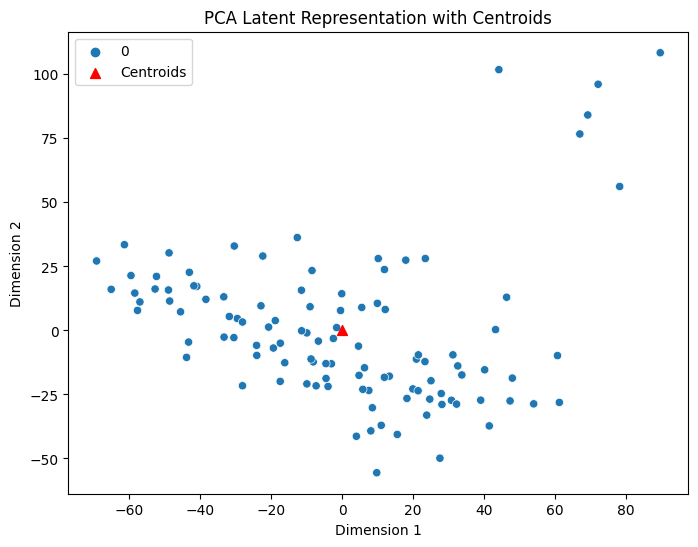

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_pca, palette=cluster_palette)
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(X, cluster_labels)


In [37]:
# Mendapatkan koordinat pusat cluster
centroid = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = np.sqrt(np.sum((X - centroid)**2, axis=1))

# Menentukan batas jarak yang dianggap sebagai "outscoop"
# Misalnya, jika ingin menentukan data yang berjarak lebih dari 2 kali standar deviasi dari centroid
outscoop_threshold = np.mean(jarak_ke_centroid) + 2 * np.std(jarak_ke_centroid)
# outscoop_threshold = threshold

# Memisahkan data yang masih masuk dalam "scoop" dan "outscoop"
scoop_data = X[jarak_ke_centroid <= outscoop_threshold]
outscoop_data = X[jarak_ke_centroid > outscoop_threshold]

# print("Data dalam scoop:")
# print(scoop_data)

# print("\nData outscoop:")
# print(outscoop_data)

print('threshold range : ', outscoop_threshold)

threshold range :  87.36877059936523


In [39]:
import os

# Assuming 'jurnal_id' is a variable containing the directory name
if not os.path.exists(f"./src/indobert/{jurnal_id}"):
  os.mkdir(f"./src/indobert/{jurnal_id}")

C:\Users\USER\AppData\Local\Temp\ipykernel_6612\805555553.py:17: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')


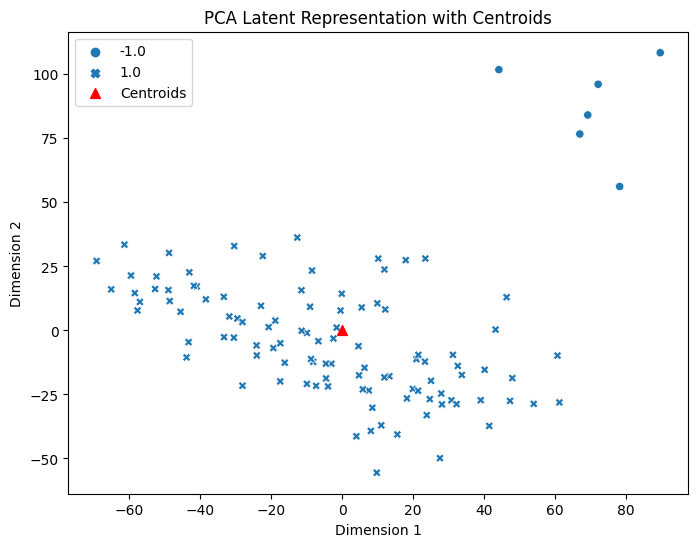

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels, scoop_labels):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    # df_pca['Cluster Label'] = kmeans_labels
    df_pca['Scoop Label'] = scoop_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.savefig(f'src/indobert/{jurnal_id}/plot.png')
    plt.show()

# Menentukan label untuk scoop dan outscoop
scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > outscoop_threshold] = -1

plot_vector_distribution(X, kmeans.labels_, scoop_labels)

In [41]:
import pandas as pd

# Membuat DataFrame dengan data teks dan label scoop
df = pd.DataFrame({'Data': data_jid['data'].astype(str).apply(comprehensive_preprocessing),
                   'Label': scoop_labels})

# Memisahkan data dalam scoop dan outscoop
inScoop_df = df[df['Label'] == 1]
outScoop_df = df[df['Label'] == -1]

inScoop_df.to_csv(f'src/indobert/{jurnal_id}/{jurnal_id}_inscoop_data_jurnal.csv')
outScoop_df.to_csv(f'src/indobert/{jurnal_id}/{jurnal_id}_outscoop_data_jurnal.csv')

print("Data dalam scoop:")
print(inScoop_df)

print("\nData outscoop:")
print(outScoop_df)


Data dalam scoop:
                                                  Data  Label
0    efektivitas perlakuan ozon mutu kangkung khas ...    1.0
1    penyimpanan mangga modifikasi atmosfir penggun...    1.0
2    pengaruh rasio susu full cream jagung manis ze...    1.0
3    kajian mutu daya simpan keju mozzarella probio...    1.0
4    pengaruh penambahan probiotik lactobacillus ca...    1.0
..                                                 ...    ...
103  potensi pembentukan pati resisten antioksidan ...    1.0
104  karakterisasi bakteri lipolitik bacillus wadi ...    1.0
105  kajian penambahan ubi jalar ungu ipomoea batat...    1.0
106  karakterisasi mutu teh hitam metode ctc crushi...    1.0
107  analisis mutu kimia mikrobiologi organoleptik ...    1.0

[103 rows x 2 columns]

Data outscoop:
                                                  Data  Label
48   rasio tepung tapioka tepung ketan tepung ubi j...   -1.0
61   effect extraction solvent total flavonoid cont...   -1.0
64   nilai z

In [42]:
# outScoop_df['Data'][552]

KeyError: 552

Predict

In [ ]:
from sklearn.decomposition import PCA

def fit_new_data_to_pca(new_data, pca):
    # Transformasi data baru ke ruang PCA yang sama dengan data lama
    new_data_pca = pca.transform(new_data.reshape(1, -1))

    return new_data_pca

In [ ]:
from Preprocessing import *

def predict_scoop(text_data, tokenizer, model, kmeans_model, scoop_threshold, pca_data):
    # Preprocess title and abstract
    processed_text = preprocess_text(text_data)

    # Tokenize new data
    encoded_dict = tokenizer.encode_plus(
        processed_text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

    # Calculate embedding for new data
    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        last_hidden_states = outputs.last_hidden_state
        new_embedding = last_hidden_states.cpu().numpy().reshape(1, -1)

    new_data_pca = fit_new_data_to_pca(new_embedding, pca)
    print("new data :", new_data_pca, "cluster center :", kmeans_model.cluster_centers_)

    # Calculate distance to centroid
    distance_to_centroid = np.sqrt(np.sum((new_data_pca - kmeans_model.cluster_centers_)**2, axis=1))
    print("Distance", distance_to_centroid, "threshold :", scoop_threshold)
    print("inscoop", distance_to_centroid <= scoop_threshold)

    # Determine if new data is in scoop or outscoop
    if distance_to_centroid <= scoop_threshold:
        prediction = "in scoop"
    else:
        prediction = "out scoop"

    return prediction, new_data_pca

In [ ]:
judul_baru = 'pengaruh penyuluhan cara menyikat gigi indeks plak gigi siswa inpres lapangan'
abstrak_baru ='penyuluhan cara menyikat gigi siswa sekolah dasar merupakan salah satu upaya promotif meningkatkan kesehatan gigi mulut anaktujuan penelitian ialah mengetahui pengaruh penyuluhan cara menyikat gigi indeks plak gigi siswa inpres lapanganpenelitian dilakukan inpres lapangan menggunakan metode penelitian quasy eksperimentaljumlah sampel diambil sebanyak siswa teknik pengambilan sampel total samplingpenelitian menggunakan uji analisis statistik wilcoxonhasil penelitian menunjukkan sebelum dilakukan penyuluhan cara menyikat gigi indeks plak awal ialah kategori sedang setelah dilakukan penyuluhan cara menyikat gigi indeks plak akhir ialah kategori baikhasil uji analisis statistik wilcoxon menunjukkan hasil analisis menunjukan pengaruh bermakna penyuluhan cara menyikat gigi indeks plak gigi siswa inpres lapangan'

text_data = judul_baru + abstrak_baru

# text_data = "halo test ini bukan bagian dari cluster"

# text_data = "efek antibakteri ekstrak kulit kelengkeng dimocarpus longan porphyromonas gingivalisporphyromonas gingivalis merupakan salah satu mikroorganisme penyebab periodontitis penggunaan chlorhexidine terbukti memberikan efek antibakteri menyebabkan efek samping berupa perubahan warna gigi nyeri xerostomia kulit kelengkeng bahan alam kandungan senyawa aktifnya fenolik tanin flavonoid triterpenoid dapat berperan antibakteri penelitian bertujuan mengetahui efek antibakteri ekstrak kulit kelengkeng bakteri porphyromonas gingivalis atcc cara mengukur rerata diameter zona hambat penelitian menggunakan metode eksperimental laboratorium kelompok perlakuan konsentrasi ekstrak hasil penelitian memperlihatkan pada kelompok perlakuan konsentrasi ekstrak menghasilkan zona hambat tidak lebih besar chlorhexidine memiliki zona hambat zona hambat terkecil dihasilkan kelompok ekstrak sebesar simpulan penelitian ialah terdapat efek antibakteri ekstrak etanol kulit kelengkeng dimocarpus longan porphyromonas gingivalis"

# Predict scoop for new data
scoop_prediction, new_embedding = predict_scoop(text_data, tokenizer, model, kmeans, outscoop_threshold, X)
print("Prediksi scoop untuk data baru:", scoop_prediction)

c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


new data : [[-15.201374 -25.025015]] cluster center : [[1.7249411e-06 4.7584585e-08]]
Distance [29.280252] threshold : 67.86057662963867
inscoop [ True]
Prediksi scoop untuk data baru: in scoop


C:\Users\USER\AppData\Local\Temp\ipykernel_14520\3623839592.py:16: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')


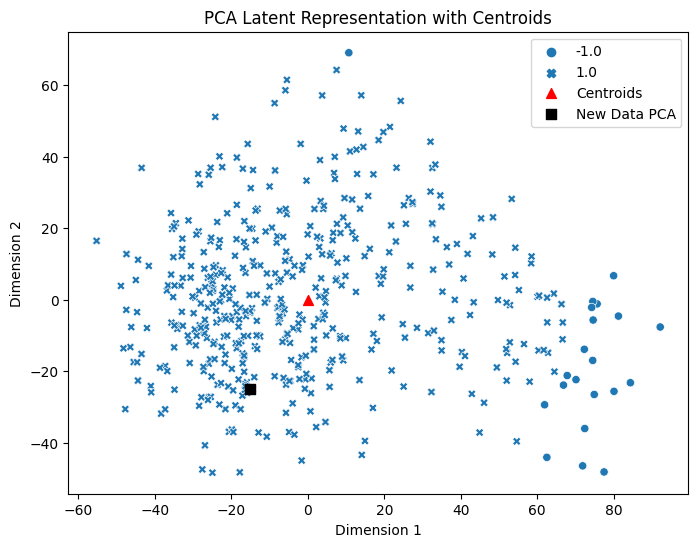

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels, scoop_labels, new_data_pca=None):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Scoop Label'] = scoop_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    # Menampilkan posisi data PCA baru
    if new_data_pca is not None:
        plt.scatter(new_data_pca[:, 0], new_data_pca[:, 1], marker='s', c='black', s=50, label='New Data PCA')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

    return df_pca


# Menentukan label untuk scoop dan outscoop
scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > outscoop_threshold] = -1

df_pca = plot_vector_distribution(X, kmeans.labels_, scoop_labels, new_embedding)

In [ ]:
judul_baru = 'pengaruh penyuluhan cara menyikat gigi indeks plak gigi siswa inpres lapangan'
abstrak_baru ='penyuluhan cara menyikat gigi siswa sekolah dasar merupakan salah satu upaya promotif meningkatkan kesehatan gigi mulut anaktujuan penelitian ialah mengetahui pengaruh penyuluhan cara menyikat gigi indeks plak gigi siswa inpres lapanganpenelitian dilakukan inpres lapangan menggunakan metode penelitian quasy eksperimentaljumlah sampel diambil sebanyak siswa teknik pengambilan sampel total samplingpenelitian menggunakan uji analisis statistik wilcoxonhasil penelitian menunjukkan sebelum dilakukan penyuluhan cara menyikat gigi indeks plak awal ialah kategori sedang setelah dilakukan penyuluhan cara menyikat gigi indeks plak akhir ialah kategori baikhasil uji analisis statistik wilcoxon menunjukkan hasil analisis menunjukan pengaruh bermakna penyuluhan cara menyikat gigi indeks plak gigi siswa inpres lapangan'

text_data = judul_baru + abstrak_baru

# text_data = "halo test ini bukan bagian dari cluster"

text_data = "efek antibakteri ekstrak kulit kelengkeng dimocarpus longan porphyromonas gingivalisporphyromonas gingivalis merupakan salah satu mikroorganisme penyebab periodontitis penggunaan chlorhexidine terbukti memberikan efek antibakteri menyebabkan efek samping berupa perubahan warna gigi nyeri xerostomia kulit kelengkeng bahan alam kandungan senyawa aktifnya fenolik tanin flavonoid triterpenoid dapat berperan antibakteri penelitian bertujuan mengetahui efek antibakteri ekstrak kulit kelengkeng bakteri porphyromonas gingivalis atcc cara mengukur rerata diameter zona hambat penelitian menggunakan metode eksperimental laboratorium kelompok perlakuan konsentrasi ekstrak hasil penelitian memperlihatkan pada kelompok perlakuan konsentrasi ekstrak menghasilkan zona hambat tidak lebih besar chlorhexidine memiliki zona hambat zona hambat terkecil dihasilkan kelompok ekstrak sebesar simpulan penelitian ialah terdapat efek antibakteri ekstrak etanol kulit kelengkeng dimocarpus longan porphyromonas gingivalis"

# Predict scoop for new data
scoop_prediction, new_embedding = predict_scoop(text_data, tokenizer, model, kmeans, outscoop_threshold, X)
print("Prediksi scoop untuk data baru:", scoop_prediction)

c:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


new data : [[79.96136  6.72707]] cluster center : [[1.7249411e-06 4.7584585e-08]]
Distance [80.24383] threshold : 67.86057662963867
inscoop [False]
Prediksi scoop untuk data baru: out scoop


C:\Users\USER\AppData\Local\Temp\ipykernel_14520\3623839592.py:16: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')


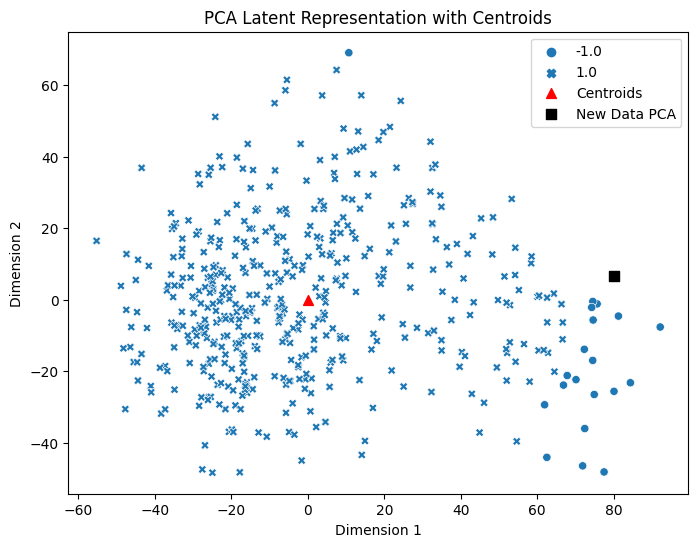

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def plot_vector_distribution(vector_representation, kmeans_labels, scoop_labels, new_data_pca=None):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Scoop Label'] = scoop_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')
    
    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')
    
    # Menampilkan posisi data PCA baru
    if new_data_pca is not None:
        plt.scatter(new_data_pca[:, 0], new_data_pca[:, 1], marker='s', c='black', s=50, label='New Data PCA')
    
    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

    return df_pca


# Menentukan label untuk scoop dan outscoop
scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > outscoop_threshold] = -1

df_pca = plot_vector_distribution(X, kmeans.labels_, scoop_labels, new_embedding)